In [9]:
import numpy as np
import pandas as pd
import pyproj
from matplotlib import pylab as plt

<div class="alert alert-block alert-danger">
    <b>Task001:</b> Loading data
    Load the dataset from <b>synth_mobility_wgs84.csv</b>
</div>

In [10]:
df = pd.read_csv('synth_mobility_wgs84.csv')

<div class="alert alert-block alert-info">
<b>Task001 verification:</b> The data should be as follows
</div>

In [3]:
df

,epoch,id,lat,lon,mod,speed
0,0,93,58.379306,26.670680,1,0.000
1,0,113,58.384715,26.670892,2,0.000
2,0,298,58.356229,26.714594,4,0.000
3,0,303,58.366927,26.607089,5,0.000
4,0,307,58.380028,26.653607,6,0.000
...,...,...,...,...,...,...
882922,14835,281,58.364580,26.905873,3,4.830
882923,14836,281,58.364589,26.905856,3,4.992
882924,14837,281,58.364599,26.905836,3,5.753
882925,14838,281,58.364608,26.905817,3,5.455


In [11]:
# Convert Geodedic latitude/logitude (WGS84 datum) to metric Spherical Pseudo-Mercator
# More specifically, we perform coordinate reference system (CRS) conversion from EPSG:4326 to EPSG:3857
geodedic2metric = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3857'))

<div class="alert alert-block alert-danger">
    <b>Task002:</b> Convert to metric coordinates using predefine CRS convertor
</div>

In [16]:
df['x'],df['y'] = geodedic2metric.transform(*df[['lon','lat']].values.T)

<div class="alert alert-block alert-info">
<b>Task002 verification:</b> The data should be as follows
</div>

In [19]:
df[df.id == 0]

,epoch,id,lat,lon,mod,speed,x,y
7,1,0,58.341532,26.717204,0,0.000,6.494550e+06,3.088184e+06
548,2,0,58.341532,26.717216,0,2.640,6.494550e+06,3.088186e+06
1091,3,0,58.341532,26.717244,0,5.955,6.494550e+06,3.088189e+06
1637,4,0,58.341532,26.717291,0,9.796,6.494550e+06,3.088195e+06
2186,5,0,58.341532,26.717350,0,12.371,6.494550e+06,3.088203e+06
...,...,...,...,...,...,...,...,...
469592,1201,0,58.346061,26.787984,0,18.936,6.495054e+06,3.097008e+06
469794,1202,0,58.346102,26.787934,0,19.565,6.495058e+06,3.097002e+06
469996,1203,0,58.346140,26.787887,0,18.011,6.495063e+06,3.096996e+06
470198,1204,0,58.346177,26.787841,0,17.848,6.495067e+06,3.096990e+06


<div class="alert alert-block alert-danger">
    <b>Task003:</b> Group the data by id, aggreagate the following columns:
</div>

* mod
* total travel time
* minimal velocity
* maximal velocity
* mean velocity
* total travel distance

In [183]:
%%time
df_dataset = df.groupby('id').apply(lambda df_gid: 
        pd.DataFrame(
        {
         'mod': np.unique(df_gid['mod'].values),
         'travel_time': np.max(df_gid['epoch'].values),
         'min_vel': np.min(df_gid['speed'].values),
         'max_vel': np.max(df_gid['speed'].values),
         'mean_vel': np.mean(df_gid['speed'].values),
         'std_vel': np.std(df_gid['speed'].values),
         'travel_dist': np.sum(np.sqrt(np.sum((df_gid[['x','y']].values[1:]-\
                                              df_gid[['x','y']].values[:-1])**2,axis=1)))
        }))

CPU times: user 1.36 s, sys: 29.5 ms, total: 1.39 s
Wall time: 1.41 s


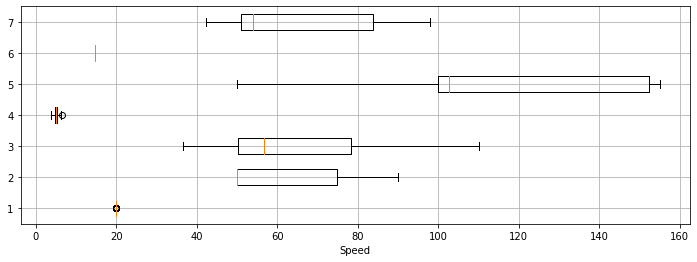

In [141]:
fig = plt.figure()
fig.set_figwidth(12)

plt.boxplot([df_dataset[df_dataset['mod'] == m]['max_vel'] for m in range(7)], vert=False)

plt.xlabel('Speed')
plt.grid()

In [32]:
df_dataset = df_dataset.set_index(np.asarray(list(df_dataset.index))[:,0])

In [33]:
df_dataset

,mod,travel_time,min_vel,max_vel,mean_vel,std_vel,travel_dist
0,0,1205,0.0,20.000,17.750343,4.367425,10480.796299
1,0,1789,0.0,20.000,18.216340,2.832486,15408.782319
2,0,611,0.0,19.993,18.659462,1.553506,5504.669279
3,0,3254,0.0,20.000,7.300061,9.149739,8281.693943
4,0,1265,0.0,20.000,17.595126,4.489754,10494.094571
...,...,...,...,...,...,...,...
549,7,2259,0.0,87.188,18.138672,18.144401,21220.709888
550,7,166,0.0,48.411,38.537584,12.824008,2671.619448
551,7,791,0.0,98.241,41.715863,21.745713,16267.474569
552,7,502,0.0,56.739,34.618006,22.538432,8300.671100


In [61]:
df_dataset[['travel_time','travel_dist']].corr()

,travel_time,travel_dist
travel_time,1.000000,0.373179
travel_dist,0.373179,1.000000


<div class="alert alert-block alert-danger">
    <b>Task004:</b> Shuffle the dataset
</div>

In [37]:
np_order = df_dataset.index.values
np.random.shuffle(np_order)
df_dataset.loc[np_order]

,mod,travel_time,min_vel,max_vel,mean_vel,std_vel,travel_dist
417,7,633,0.0,79.267,49.399659,16.514392,14479.738028
257,3,2404,0.0,5.536,4.956520,0.461378,5483.936887
271,3,3457,0.0,4.913,4.383044,0.473912,5904.617224
400,7,1426,0.0,84.087,27.777694,23.016756,20004.038252
264,3,6815,0.0,4.378,3.918809,0.363983,12379.579504
...,...,...,...,...,...,...,...
12,0,1297,0.0,19.998,18.767711,1.175904,11730.110272
518,7,230,0.0,52.224,28.326257,19.798309,3175.809580
130,2,310,0.0,57.556,32.195026,17.282598,4228.859372
267,3,5684,0.0,4.447,3.864577,0.755387,7797.797871


In [42]:
# Split into training / tersting (80/20)
n_training = int(len(df_dataset) * .8)
n_testing = len(df_dataset)-n_training

In [41]:
n_training, n_testing

(387, 167)

In [43]:
np.asarray([n_training, n_testing]).astype(np.float64) / np.sum([n_training, n_testing]) * 100.

array([79.96389892, 20.03610108])

In [44]:
df_training = df_dataset.loc[np_order][:n_training]
df_testing = df_dataset.loc[np_order][n_training:]

In [45]:
df_training

,mod,travel_time,min_vel,max_vel,mean_vel,std_vel,travel_dist
417,7,633,0.0,79.267,49.399659,16.514392,14479.738028
257,3,2404,0.0,5.536,4.956520,0.461378,5483.936887
271,3,3457,0.0,4.913,4.383044,0.473912,5904.617224
400,7,1426,0.0,84.087,27.777694,23.016756,20004.038252
264,3,6815,0.0,4.378,3.918809,0.363983,12379.579504
...,...,...,...,...,...,...,...
344,6,2297,0.0,83.910,21.973984,23.464803,25872.227373
131,2,2888,0.0,72.239,6.450491,16.508208,8015.668126
507,7,1442,0.0,88.839,42.437743,24.205381,30483.600394
196,2,1065,0.0,45.784,30.266338,15.198733,12927.670881


In [49]:
df_training.groupby('mod').mod.count() / np.sum(df_training.groupby('mod').mod.count()) * 100.

mod
0    15.801354
1     3.611738
2    17.155756
3    16.252822
4     0.902935
5     0.902935
6    10.158014
7    35.214447
Name: mod, dtype: float64

In [184]:
24. / 8

3.0

In [46]:
df_testing

,mod,travel_time,min_vel,max_vel,mean_vel,std_vel,travel_dist
498,7,566,0.0,81.551,44.084410,16.798950,11335.186425
248,3,9978,0.0,5.241,4.714979,0.320801,20637.108157
223,3,2473,0.0,4.966,4.381474,0.691105,4463.031523
549,7,2259,0.0,87.188,18.138672,18.144401,21220.709888
200,2,1052,0.0,48.553,23.528207,19.485897,11915.679983
...,...,...,...,...,...,...,...
12,0,1297,0.0,19.998,18.767711,1.175904,11730.110272
518,7,230,0.0,52.224,28.326257,19.798309,3175.809580
130,2,310,0.0,57.556,32.195026,17.282598,4228.859372
267,3,5684,0.0,4.447,3.864577,0.755387,7797.797871


In [50]:
df_testing.groupby('mod').mod.count() / np.sum(df_testing.groupby('mod').mod.count()) * 100.

mod
0    20.720721
1     3.603604
2    18.018018
3    15.315315
4     0.900901
6     3.603604
7    37.837838
Name: mod, dtype: float64

In [ ]:
# Dataset is ready to perform supervised machine learning (ML)
# Let's start with Naive Bayesian Classifier

<div class="alert alert-block alert-danger">
    <b>Task005:</b> Summarize dataset by class (mod)
    <p>Collect mean, max, min, count, std for each column!</p>
</div>

In [142]:
# Summarize dataset by class (mod)
# Let's do it simple first, and only use 2 variables (travel time and travel_distance)

df_train_class_desc = df_training.groupby('mod')[['travel_time','travel_dist', 'max_vel']].describe()
df_train_class_desc

travel_time                                                             \
          count         mean          std    min      25%     50%      75%   
mod                                                                          
0          70.0  1145.542857   708.486194  314.0   577.75  1040.0  1294.25   
1          16.0   817.750000   591.676657  213.0   438.50   632.0  1009.25   
2          76.0  1001.736842   675.650943  210.0   533.25   831.5  1196.00   
3          72.0  5252.611111  3253.489016  480.0  2665.50  4853.0  7103.75   
4           4.0   414.500000   337.364788  200.0   245.75   270.0   438.75   
5           4.0  1021.250000   515.016100  411.0   714.75  1044.5  1351.00   
6          45.0   992.177778   686.231550  239.0   497.00   794.0  1411.00   
7         156.0   818.769231   521.595775  141.0   458.50   698.0  1051.25   

             travel_dist                ...                              \
         max       count          mean  ...           75%           max   
mod                                     ...                               
0     3606.0        70.0   8285.846338  ...  10433.511680  18479.902171   
1     2383.0        16.0  11969.269327  ...  16611.033994  28343.673798   
2     2888.0        76.0  11330.840404  ...  15363.535227  29214.113094   
3    14839.0        72.0  10627.154487  ...  13471.670320  37882.835171   
4      918.0         4.0   9836.869717  ...  10476.604931  26884.139872   
5     1585.0         4.0   6806.911615  ...   9625.912823   9724.494440   
6     2892.0        45.0  11003.675198  ...  14089.224393  25872.227373   
7     2522.0       156.0  11078.211202  ...  14564.450217  32098.773178   

    max_vel                                                                \
      count        mean        std     min       25%       50%        75%   
mod                                                                         
0      70.0   19.998471   0.002822  19.986  19.99800   20.0000   20.00000   
1      16.0   66.186688  18.196948  49.990  50.00000   59.6245   89.97650   
2      76.0   67.098408  19.057647  41.105  50.71575   62.3000   84.40850   
3      72.0    5.057111   0.577880   3.821   4.70800    5.0350    5.37525   
4       4.0  101.223000  41.812636  50.004  87.42600  101.2500  115.04700   
5       4.0   14.845000   0.000000  14.845  14.84500   14.8450   14.84500   
6      45.0   65.957911  17.937503  42.258  51.09100   55.9080   86.14200   
7     156.0   62.545179  17.639990  35.351  48.99825   55.2300   77.45325   

              
         max  
mod           
0     20.000  
1     90.000  
2    110.281  
3      6.602  
4    152.388  
5     14.845  
6     97.976  
7    108.171  

[8 rows x 24 columns]

In [143]:
needed_cols = [(col,desc) for col,desc in df_train_class_desc.columns if desc in ['mean','std','count']]
needed_cols

[('travel_time', 'count'),
 ('travel_time', 'mean'),
 ('travel_time', 'std'),
 ('travel_dist', 'count'),
 ('travel_dist', 'mean'),
 ('travel_dist', 'std'),
 ('max_vel', 'count'),
 ('max_vel', 'mean'),
 ('max_vel', 'std')]

In [144]:
naive_model = df_train_class_desc[needed_cols]

In [151]:
naive_model[('max_vel','mean')]

mod
0     19.998471
1     66.186688
2     67.098408
3      5.057111
4    101.223000
5     14.845000
6     65.957911
7     62.545179
Name: (max_vel, mean), dtype: float64

In [5]:
# The model is ready let's proceed to testing the naive model!

<div class="alert alert-block alert-danger">
    <b>Task006:</b> Define Gaussian probability density function (PDF)
    <p>The formula is as follows:</p>
</div>

$g(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\exp {\left(-{\frac {1}{2}}{\frac {(x-\mu )^{2}}{\sigma ^{2}}}\right)}$

In [67]:
def gaussian_pdf(x, mu, sigma):
    exp = np.exp(-((x-mu)**2 / (2 * sigma**2 )))
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * exp

In [59]:
# Test Gaussian PDF
print(gaussian_pdf(1.0, 1.0, 1.0))
print(gaussian_pdf(2.0, 1.0, 1.0))
print(gaussian_pdf(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


<div class="alert alert-block alert-danger">
    <b>Task007:</b> Remember how do we calculated the probabilities ? and we have how many parameters ?
</div>

In [165]:
# Let's do it with one sample from testing set
#df_testing.loc[267]
x = df_testing[df_testing['mod'].values == 1].iloc[0]

In [166]:
x.max_vel

69.97

In [167]:
# Lets estimate probability of x being in class 0
class0 = naive_model.loc[0]

In [168]:
class0

travel_time  count      70.000000
             mean     1145.542857
             std       708.486194
travel_dist  count      70.000000
             mean     8285.846338
             std      3956.171424
max_vel      count      70.000000
             mean       19.998471
             std         0.002822
Name: 0, dtype: float64

<div class="alert alert-block alert-danger">
    <b>Task008:</b> Calculate probabiltity values of x.travel_time fall within the dsitribution class0 travel_time.mean, travel_time.std
</div>

In [169]:
gaussian_pdf(x.travel_time, class0[('travel_time','mean')], class0[('travel_time','std')])

0.0003280140612506257

<div class="alert alert-block alert-danger">
    <b>Task009:</b> Calculate probabiltity based on second var (travel_dist)
</div>

In [170]:
gaussian_pdf(x.travel_time, class0[('travel_dist','mean')], class0[('travel_dist','std')])

1.3893826815065487e-05

<div class="alert alert-block alert-danger">
    <b>Task010:</b>Calculate Marginal probability of class 0
</div>

In [171]:
total_records_per_class = df_training.groupby('mod').mod.count()
total_records_per_class

mod
0     70
1     16
2     76
3     72
4      4
5      4
6     45
7    156
Name: mod, dtype: int64

In [172]:
marginal_p_per_class = total_records_per_class / np.sum(total_records_per_class)
marginal_p_per_class

mod
0    0.158014
1    0.036117
2    0.171558
3    0.162528
4    0.009029
5    0.009029
6    0.101580
7    0.352144
Name: mod, dtype: float64

In [173]:
# Finaly we can give estimation of sample x being in class 0:
gaussian_pdf(x.travel_time, class0[('travel_time','mean')], class0[('travel_time','std')]) *\
gaussian_pdf(x.travel_dist, class0[('travel_dist','mean')], class0[('travel_dist','std')]) *\
gaussian_pdf(x.max_vel, class0[('max_vel','mean')], class0[('max_vel','std')]) *\
marginal_p_per_class.loc[0]

0.0

In [174]:
# But what about the other classes ?
# Just use vector ops :)
sample_x_classification =\
gaussian_pdf(x.travel_time, naive_model[('travel_time','mean')], naive_model[('travel_time','std')]) *\
gaussian_pdf(x.travel_dist, naive_model[('travel_dist','mean')], naive_model[('travel_dist','std')]) *\
gaussian_pdf(x.max_vel, naive_model[('max_vel','mean')], naive_model[('max_vel','std')]) *\
marginal_p_per_class

In [177]:
sample_x_classification

mod
0    0.000000e+00
1    2.298746e-11
2    9.239693e-11
3    0.000000e+00
4    2.697264e-12
5             NaN
6    5.835799e-11
7    2.445107e-10
dtype: float64

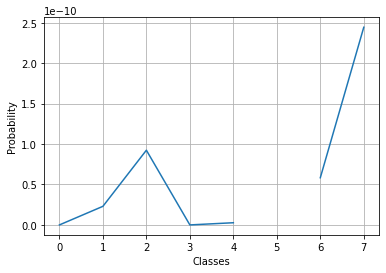

In [178]:
plt.plot(sample_x_classification)
plt.ylabel('Probability')
plt.xlabel('Classes')
plt.grid()

In [179]:
# And the highest likely class ist:
class_x = np.argmax(sample_x_classification)
class_x

7

In [180]:
# With the probability
sample_x_classification[class_x]

2.4451072300379914e-10

In [181]:
df_testing.loc[x.name]

mod               1.000000
travel_time     409.000000
min_vel           0.000000
max_vel          69.970000
mean_vel         49.735976
std_vel          14.422708
travel_dist    9300.026114
Name: 107, dtype: float64

In [182]:
# And actually sample x belongs to:
int(df_testing.loc[x.name]['mod'])

1

In [121]:
df_dataset.mod

<bound method flex_arith_method_FRAME.<locals>.f of      mod  travel_time  min_vel  max_vel   mean_vel    std_vel   travel_dist
417    0         1205      0.0   20.000  17.750343   4.367425  10480.796299
257    0         1789      0.0   20.000  18.216340   2.832486  15408.782319
271    0          611      0.0   19.993  18.659462   1.553506   5504.669279
400    0         3254      0.0   20.000   7.300061   9.149739   8281.693943
264    0         1265      0.0   20.000  17.595126   4.489754  10494.094571
..   ...          ...      ...      ...        ...        ...           ...
12     7         2259      0.0   87.188  18.138672  18.144401  21220.709888
518    7          166      0.0   48.411  38.537584  12.824008   2671.619448
130    7          791      0.0   98.241  41.715863  21.745713  16267.474569
267    7          502      0.0   56.739  34.618006  22.538432   8300.671100
73     7         1316      0.0   94.511  30.848201  25.754855  20675.080360

[554 rows x 7 columns]>

In [124]:

df_testing[df_testing['mod'].values == 0].iloc[0]

mod               0.000000
travel_time     878.000000
min_vel           0.000000
max_vel          19.997000
mean_vel         15.066642
std_vel           7.262535
travel_dist    6197.573997
Name: 8, dtype: float64

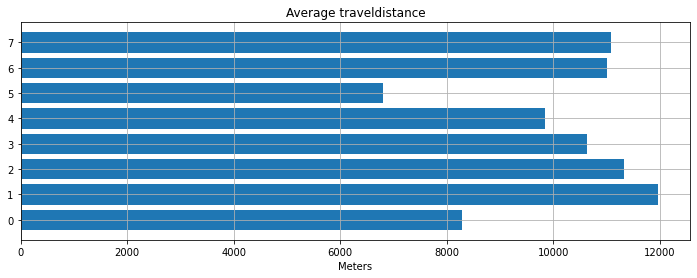

In [113]:
fig = plt.figure()
fig.set_figwidth(12)
mod_travel_dist = df_training.groupby('mod').travel_dist.mean()
plt.barh(mod_travel_dist.index, mod_travel_dist)
#plt.yticks(mod_idx, [mods[i] for i in mod_idx])
xticks = plt.xticks()[0]
#plt.xticks(xticks, ['%.01f' % (s/60.) for s in xticks])
plt.xlabel('Meters')
plt.title('Average traveldistance')
plt.grid()

In [ ]:
# Next let's try out with K-nearest neighbour
# And let's try with 2 parameters